# Plotting P-value curves

In [1]:
import sys
sys.path.append("./modules")

import utils
import scipy.stats as st

from os import listdir
from os.path import isfile, join


import statsmodels.stats.multitest as mt
import statsmodels.api as sm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns


%reload_ext autoreload
%autoreload 2

# useful utilities
# -----------------------
import PDplot
# -----------------------


# Universal distribtion
# -----------------------
RVSTD = st.gumbel_l()
# -----------------------

# Data location
# -----------------------
ROOT = './files'
# -----------------------

# Visual fine tuning
# -----------------------
sns.set_theme(style="darkgrid")
FIG_SIZE = (18,5)


# Annulus - changing radius

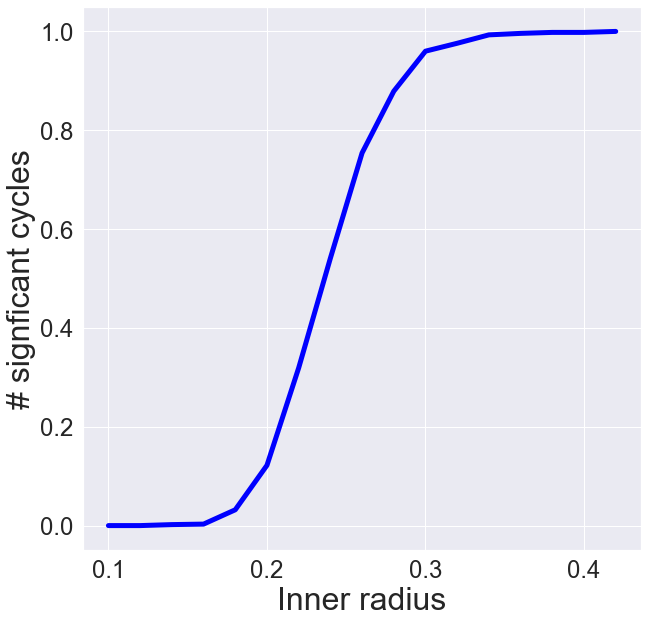

In [2]:
# ANNULUS
# -----------------
# Z is a matrix with first column inner radius
#   and second column is average number of cycles detected
# n is a tuple with number of repetitions and number of tested
#   r values
Z,n = np.load('./pval_files/annulus_radius_pval.npy',allow_pickle=True)

# plot 
#-----
plt.figure(figsize=(10,10))
ax = plt.axes()
plt.plot(Z[:,0],Z[:,1],label=f'{n[0]} repetitions',linewidth=5,c='blue')
plt.xlabel('Inner radius',fontsize=32)
plt.ylabel('# signficant cycles',fontsize=32)
ax.tick_params(labelsize=24)

plt.savefig('annulus_plot1000.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

# Annulus - changing cut width

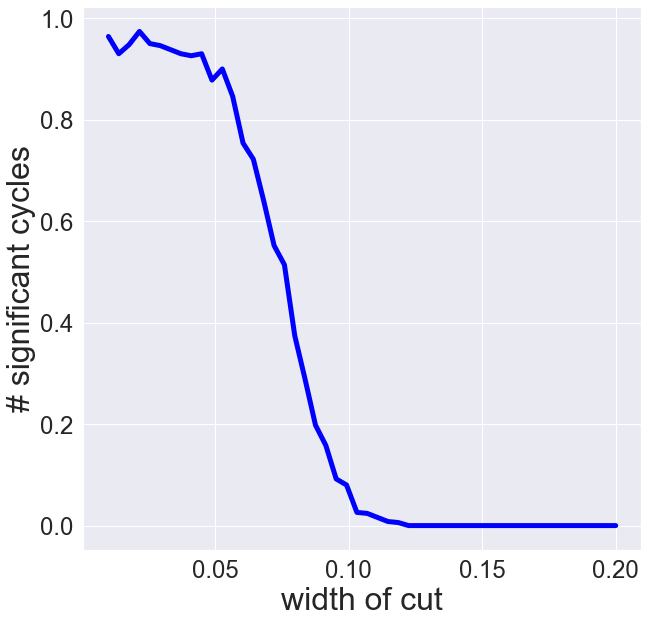

In [3]:
# ANNULUS WITH CUT
#--------------

# file experiments 
P = np.load('./pval_files/annulus_cut_pval.npy',allow_pickle=True)

# width vector - got from experiments 
W = np.linspace(0.01,0.2,50)

# plotting
plt.figure(figsize=(10,10))
ax = plt.axes()
plt.plot(W,np.sum(P,axis=0),linewidth=5,c='blue')
plt.xlabel('width of cut',fontsize=32)
plt.ylabel('# significant cycles',fontsize=32)
ax.tick_params(labelsize=24)
plt.savefig('cut_annulus_plot.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

# Figure 8

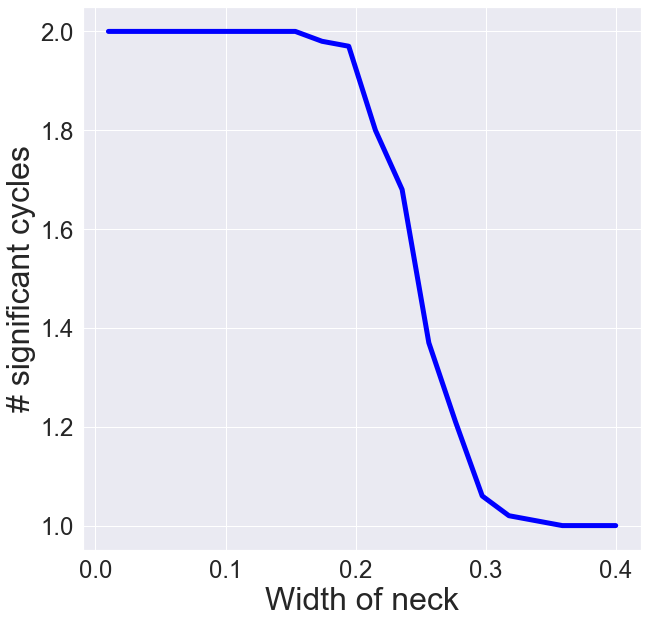

In [4]:
# load experiments
P = np.load('./pval_files/fig8_pval.npz',allow_pickle=True)
# P['vals'] contains the width of the neck
# P['cyc'] contains the average number of cycles detected


# plotting
plt.figure(figsize=(10,10))
ax = plt.axes()

plt.plot(P['vals'],np.sum(P['cyc'],axis=0),linewidth=5,c='blue')
plt.xlabel('Width of neck',fontsize=32)
plt.ylabel('# significant cycles',fontsize=32)
ax.tick_params(labelsize=24)
plt.savefig('fig8_sig.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

# Patches 

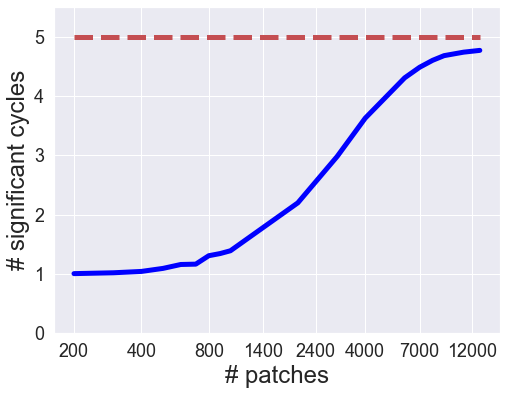

In [5]:
# load PV
#---------

PV = pd.read_pickle('./pval_files/patches_pval.pkl')

mean = PV.groupby('num')['sig'].mean()
min1 = PV.groupby('num')['sig'].min()
max1 = PV.groupby('num')['sig'].max()
std1 = PV.groupby('num')['sig'].std()

plt.figure(figsize=(8,6))
ax = plt.axes()
 
ax.semilogx(mean.index, mean,base=10,linewidth=5,c='blue')
ax.plot(mean.index,5*np.ones(mean.shape),'r--',linewidth=5)
ax.xaxis.set_ticks([200,400,800,1400,2400,4000,7000,12000])  
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%d"))
ax.set_xlabel('# patches',fontsize=24)
ax.set_ylabel('# significant cycles',fontsize=24)
ax.set_ylim([0, 5.5])
ax.tick_params(labelsize=18 )

plt.savefig('patches_sig1.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

## Table of comparison of sizes at threshold for an embedded torus

In [6]:
# load values
P = np.load('./pval_files/comparison_number_edges.npz',allow_pickle=True)

# read in dataframe 
# columns: 
# pts: number of points,
# th: computed threshold, 
# e1: number of edges at full threshold (r=2)
# e2: number of edges at th
S = pd.DataFrame(data=P['arr_0'],columns=['pts','th','e1','e2'])
 
# compute ratio
S['r'] = S['e1']/S['e2']

# write out table
S.groupby('pts').mean()

,th,e1,e2,r
pts,,,,
2000.0,1.984916,489943.2,475131.6,1.031174
5000.0,1.674439,3067434.4,1876071.4,1.635033
10000.0,1.410297,12220703.6,5022182.0,2.433349
20000.0,1.190907,49074443.4,13942733.2,3.519745
50000.0,0.946383,306580251.6,53581472.4,5.721767
